<a href="https://colab.research.google.com/github/shaina-12/Artificial-Intelligence/blob/main/Deep%20Learning/Linear_Regression_Using_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
house = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Datasets/kc_house_data.csv')
house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
house = house.drop(['id','yr_built','yr_renovated','zipcode','lat','long','date'],axis=1)
house.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1800,7503


In [5]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  sqft_living15  21613 non-null  int64  
 13  sqft_lot15     21613 non-null  int64  
dtypes: float64(3), int64(11)
memory usage: 2.3 MB


In [6]:
house.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [7]:
house.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [8]:
house.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,6210.000000,871200.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


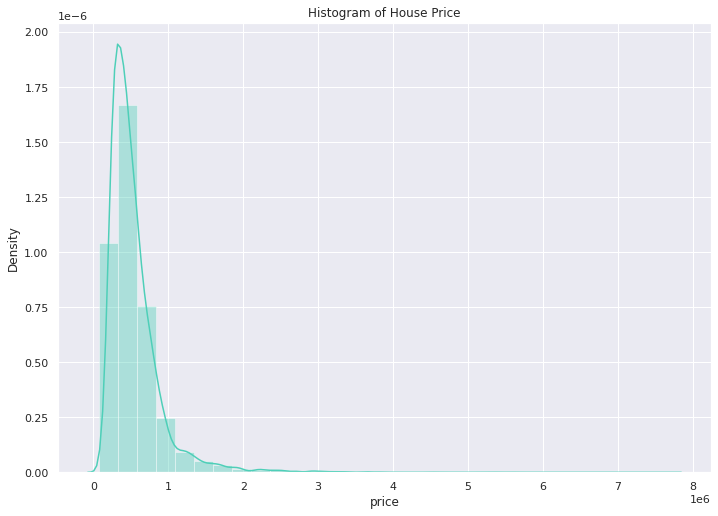

In [9]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(house['price'],bins=30,color='#4ecfb8')
plt.title('Histogram of House Price')
plt.show()

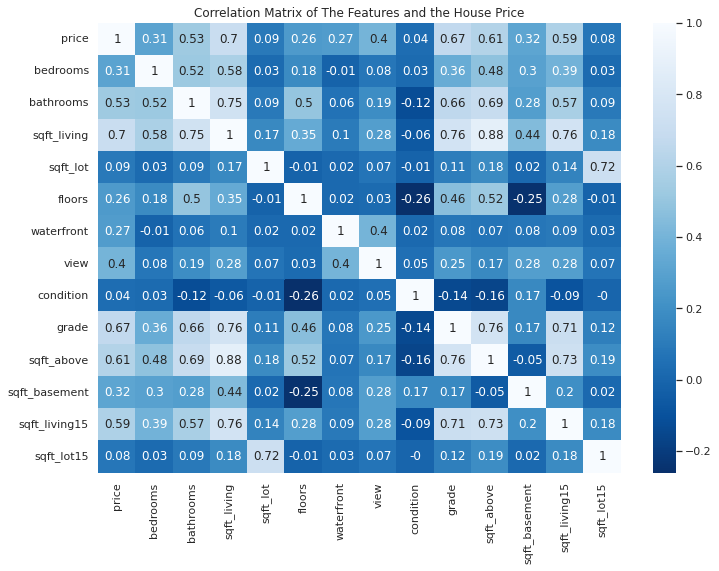

In [10]:
correlation_matrix = house.corr().round(2)
sns.heatmap(data=correlation_matrix,annot=True,cmap='Blues_r')
plt.title('Correlation Matrix of The Features and the House Price')
plt.show()

In [11]:
house.shape

(21613, 14)

In [12]:
target = house['price']
features = house.drop(['price'],axis=1)

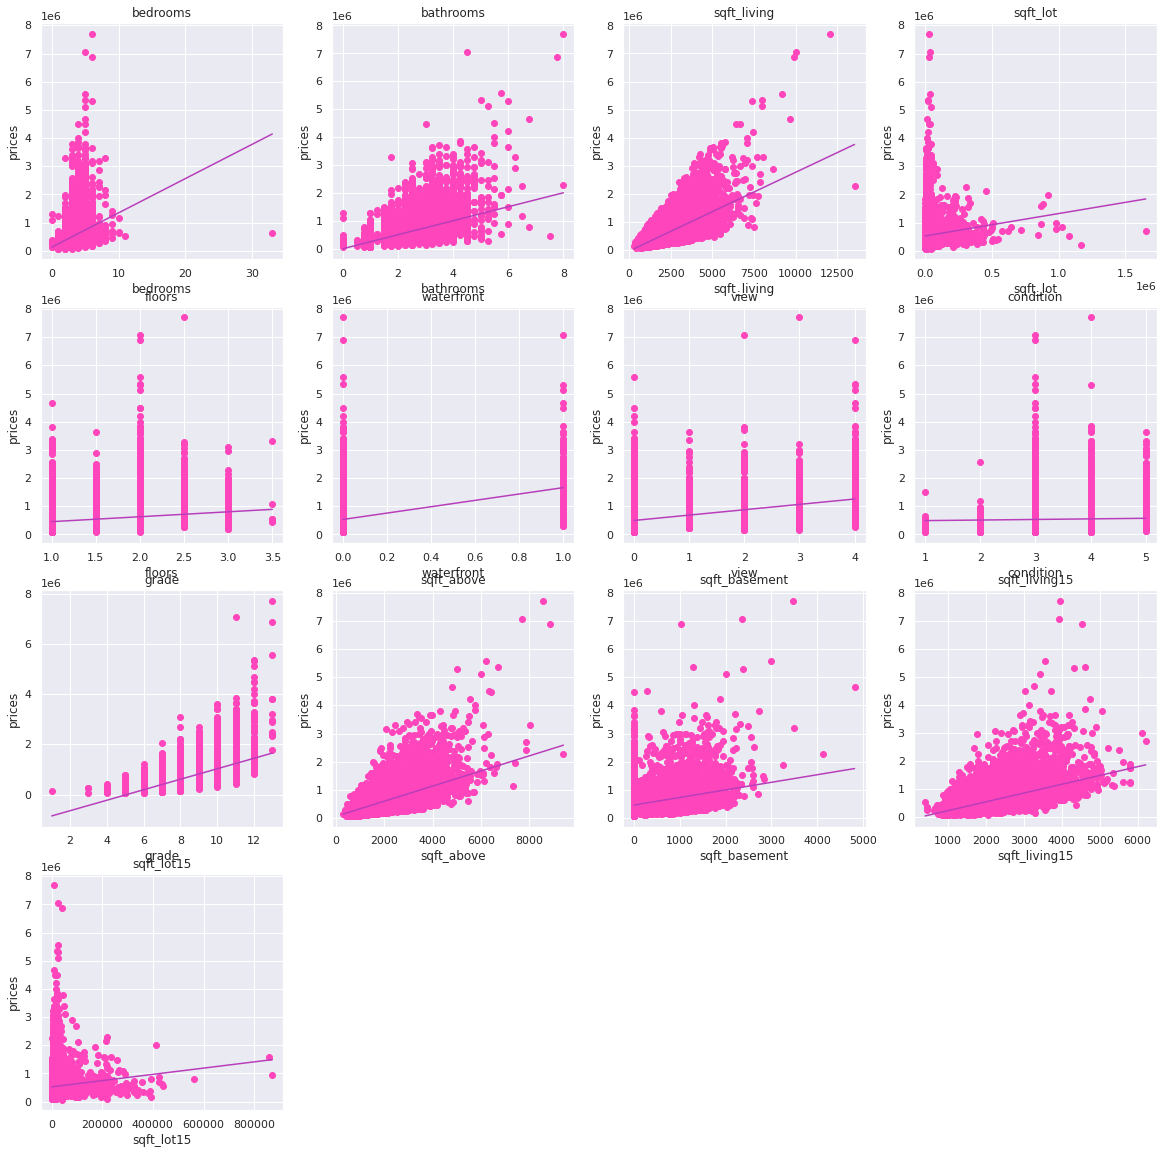

In [13]:
plt.figure(figsize=(20,20))
for i, col in enumerate(house.columns[1:14]):
  plt.subplot(4,4,i+1)
  x = house[col]
  y = house['price']
  plt.plot(x,y,'o',color='#ff45bb')
  plt.plot(np.unique(x),np.poly1d(np.polyfit(x,y,1))(np.unique(x)),color='#b83dba')
  plt.title(col)
  plt.xlabel(col)
  plt.ylabel('prices')
plt.show()

In [43]:
new_target = house.iloc[:,0].values
new_features = house.iloc[:,1:].values

In [74]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(new_features,new_target,test_size=0.20,random_state=10)

In [75]:
print(type(x_train))
print(type(x_test))
print(type(y_train))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [76]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(17290, 13)
(4323, 13)
(17290,)
(4323,)


In [77]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

In [78]:
# training data
x_train = torch.from_numpy(x_train).float()
y_train = torch.from_numpy(y_train.reshape((17290,1)))
training_data = TensorDataset(x_train,y_train)
batch_size = 10
training_data_ld = DataLoader(training_data, batch_size, shuffle=True) 

In [79]:
# test data
x_test = torch.from_numpy(x_test).float()
y_test = torch.from_numpy(y_test.reshape((4323,1)))
test_data = TensorDataset(x_test,y_test)
batch_size = 10
test_data_ld = DataLoader(test_data, batch_size, shuffle=True) 

In [102]:
# defining the linear model
model = nn.Linear(13, 1)
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[-0.0358,  0.2433, -0.1424, -0.1639, -0.2467, -0.1278, -0.2743,  0.0491,
         -0.2751,  0.2686,  0.1136, -0.2569, -0.1019]], requires_grad=True)
Parameter containing:
tensor([-0.0700], requires_grad=True)


In [103]:
# Parameters
list(model.parameters())

[Parameter containing:
 tensor([[-0.0358,  0.2433, -0.1424, -0.1639, -0.2467, -0.1278, -0.2743,  0.0491,
          -0.2751,  0.2686,  0.1136, -0.2569, -0.1019]], requires_grad=True),
 Parameter containing:
 tensor([-0.0700], requires_grad=True)]

In [104]:
# Generate predictions
preds = model(x_train.float())
preds

tensor([[-2902.1318],
        [-1847.5726],
        [-1131.6050],
        ...,
        [-2673.6460],
        [-2084.0093],
        [-2445.7888]], grad_fn=<AddmmBackward0>)

In [105]:
# Loss Function
import torch.nn.functional as F
# Define Loss Function
loss_fn = F.mse_loss
loss = loss_fn(model(x_train),y_train)
print(loss)

tensor(4.2892e+11, dtype=torch.float64, grad_fn=<MseLossBackward0>)


In [106]:
# Define optimizer
opt = torch.optim.SGD(model.parameters(), lr=1e-5)

In [107]:
# training of the model
def fit(num_epochs,model,loss_fn,opt,train_dl):
  # Repeat for given number of iterations
  for epochs in range(num_epochs):
    # train with batches of data
    for x, y in training_data_ld:
      # Generate predictions
      pred = model(x)
      # calculate the loss
      loss = loss_fn(model(x),y)
      # update the parameters using gradients
      opt.step()
      # reset the gradients to zero
      opt.zero_grad()
    # Print the progress
    if ((epochs+1) % 100 == 0):
      print('Epoch [{}/{}], Loss: {:.4f}'.format(epochs+1, num_epochs, loss.item()))

In [108]:
fit(1000,model,loss_fn,opt,training_data_ld)

Epoch [100/1000], Loss: 1123220929772.5493
Epoch [200/1000], Loss: 278371686348.7566
Epoch [300/1000], Loss: 297082488941.7360
Epoch [400/1000], Loss: 889375174989.1019
Epoch [500/1000], Loss: 289963719456.5441
Epoch [600/1000], Loss: 330415332014.6164
Epoch [700/1000], Loss: 279310638678.9517
Epoch [800/1000], Loss: 183602653015.2455
Epoch [900/1000], Loss: 384030340193.9360
Epoch [1000/1000], Loss: 358681742341.2327


In [109]:
preds = model(x_test)
preds

tensor([[-4423.9448],
        [-1711.0171],
        [-6131.3350],
        ...,
        [-4552.6372],
        [-2181.4504],
        [-1900.9935]], grad_fn=<AddmmBackward0>)

In [110]:
loss = loss_fn(preds,y_test)
print(loss)

tensor(4.4242e+11, dtype=torch.float64, grad_fn=<MseLossBackward0>)
